<a href="https://colab.research.google.com/github/pujaroy280/AI-Foundations/blob/main/Puja_Roy_DATA_602_Final_Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Sentiment Analysis of Amazon’s Top 100 Bestselling Book Reviews: Understanding Customer Opinions**

**Introduction**:

The goal of this project is to perform sentiment analysis on the reviews of Amazon’s Top 100 Bestselling Books. By analyzing the sentiment expressed in these reviews, I aim to gain insights into customer preferences and opinions regarding bestselling books. This analysis will not only provide valuable information for book publishers and authors but also help potential readers in making informed decisions.

**Motivation**:

Understanding customer sentiments towards popular books is crucial for various stakeholders in the publishing industry. By deciphering the underlying sentiments expressed in reviews, publishers can identify the strengths and weaknesses of their offerings, while authors can gain insights into reader preferences and areas for improvement.

**Research Question:**

How do customers perceive and express their sentiments towards Amazon’s Top 100 Bestselling Books, and what insights can be gathered from their reviews?

**Justification: Why is this relevant to you or industry?**

This is relevant to me because I have a strong interest in working for the publishing industry as well as having a fond for reading books sold by Amazon. This project will also assist me in analyzing and visualizing customers preferences and opinions on books based on their reviews.

**Libraries potentially being used.**

For this project, several libraries were used to perform various tasks:

1. **pandas**: Used for data manipulation and analysis, including loading the dataset, data cleaning, and filtering.

2. **NLTK (Natural Language Toolkit)**: Utilized for text preprocessing tasks such as tokenization, stopwords removal, and sentiment analysis.

3. **wordcloud**: Employed to generate word clouds for visualizing the most frequent words in positive and negative reviews.

4. **matplotlib.pyplot**: Utilized for creating visualizations, including plots and word cloud displays.

5. **string**: Used for handling string-related operations, such as removing punctuation during text preprocessing.

These libraries collectively enabled data handling, text preprocessing, sentiment analysis, and visualization, facilitating a comprehensive analysis of the Amazon's Top 100 Bestselling Book reviews.

**EDA & Summary Statistics**

*   Checking the dimensions and structure of the dataset.

*   Displaying a sample of the data to understand its format and content.

*   Examining summary statistics for numerical variables, such as sentiment scores.

*   Calculating the frequency of positive and negative sentiment words.

*   Visualizing the distribution of sentiment scores and word frequencies using bar plots and word clouds.


**Data Sources:**

The primary data source for this analysis will be the dataset available on Kaggle containing reviews of Amazon’s Top 100 Bestselling Books: https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews.

**Abstract**

This project aims to understand what people ruminate about the top 100 bestselling books on Amazon. I will utilize sentiment analysis to observe if people like or dislike these books and why. This is important because it helps book publishers and authors know what readers like and don’t like. I want to conduct this project because learning how people feel about popular books is really important for everyone involved in publishing and selling books. If publishers know what readers like, they can author improvised books. And if authors understand what readers want, they can write better stories. I will retrieve data from a website called Kaggle, where people share datasets. If time permits, I might also look at other websites like Goodreads to get more information. I will apply a step-by-step process called OSEMN: Obtain, Scrub, Explore, Model, and Interpret. First, I will obtain the data and clean it up. Then, I will observe the data to intepret what people are commenting about the books. After that, I will use numbers to see if people like the books or not. Finally, I will generate various data visualizations to display insights and results. One cool thing I'm doing is using lists of positive and negative words to figure out if reviews are good or bad. Hopefully, this project will help everyone understand more about what people like and don’t like in popular books sold by Amazon.

### **Importing Libraries & Packages**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### **Load the Data**

In [2]:
# Load the data
url = "https://raw.githubusercontent.com/pujaroy280/DATA602FinalProject/main/customer%20reviews.csv"
amazon_reviews = pd.read_csv(url)

### **Exploratory Data Analysis + Data Wrangling**

In [3]:
# Display the first few rows of the DataFrame
amazon_reviews.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [4]:
amazon_reviews.tail()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244
919,919,The Wonky Donkey,Awesome Book,MC,5,This book was hysterical! My daughter loves it...,True,23-10-2023,"Reviewed in the United States October 23, 2023",545261244


In [5]:
print(amazon_reviews.columns)

Index(['Sno', 'book name', 'review title', 'reviewer', 'reviewer rating',
       'review description', 'is_verified', 'date', 'timestamp', 'ASIN'],
      dtype='object')


In [6]:
amazon_reviews['review description']

0      I'm only a third way in. Shipped lightening fa...
1      "There have been so many times when I was scar...
2      The media could not be loaded. I personally ha...
3      I have been a fan of Britney's music since the...
4      Whether or not you’re a fan, it’s a great read...
                             ...                        
915    This is exactly the kind of book children unde...
916    We get this book for all our grandchildren the...
917    I saw a grandma reading this book to her grand...
918    I have ordered this book over and over to give...
919    This book was hysterical! My daughter loves it...
Name: review description, Length: 920, dtype: object

In [7]:
# Display summary statistics
print(amazon_reviews.describe())

              Sno  reviewer rating
count  920.000000       920.000000
mean   459.500000         4.826087
std    265.725422         0.432839
min      0.000000         2.000000
25%    229.750000         5.000000
50%    459.500000         5.000000
75%    689.250000         5.000000
max    919.000000         5.000000


In [8]:
# Data Exploration
print(amazon_reviews.info())
print(amazon_reviews.describe())
print(amazon_reviews.isna().sum())
duplicates = amazon_reviews[amazon_reviews.duplicated()]
print(duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 920 non-null    int64 
 1   book name           920 non-null    object
 2   review title        920 non-null    object
 3   reviewer            920 non-null    object
 4   reviewer rating     920 non-null    int64 
 5   review description  920 non-null    object
 6   is_verified         920 non-null    bool  
 7   date                920 non-null    object
 8   timestamp           920 non-null    object
 9   ASIN                920 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 65.7+ KB
None
              Sno  reviewer rating
count  920.000000       920.000000
mean   459.500000         4.826087
std    265.725422         0.432839
min      0.000000         2.000000
25%    229.750000         5.000000
50%    459.500000         5.000000
75%    68

In [9]:
print(amazon_reviews)

     Sno         book name                                       review title  \
0      0   The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1      1   The Woman in Me                         What a heartbreaking story   
2      2   The Woman in Me  Britney you are so invincible! You are an insp...   
3      3   The Woman in Me                               Fast Read, Sad Story   
4      4   The Woman in Me                       Buy it, it’s worth the read!   
..   ...               ...                                                ...   
915  915  The Wonky Donkey       The best child/grandmother book ever written   
916  916  The Wonky Donkey                                         Great book   
917  917  The Wonky Donkey                          Fun book, makes you laugh   
918  918  The Wonky Donkey                                 Cutest beck ever!!   
919  919  The Wonky Donkey                                       Awesome Book   

               reviewer  re

In [10]:
# Dropping columns "is_verified" and "ASIN"
amazon_reviews.drop(columns=['is_verified', 'ASIN'], inplace=True)

In [11]:
amazon_reviews

,Sno,book name,review title,reviewer,reviewer rating,review description,date,timestamp
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,26-10-2023,"Reviewed in the United States October 26, 2023"
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",06-11-2023,"Reviewed in the United States November 6, 2023"
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,01-11-2023,"Reviewed in the United States November 1, 2023"
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,25-10-2023,"Reviewed in the United States October 25, 2023"
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",01-11-2023,"Reviewed in the United States November 1, 2023"
...,...,...,...,...,...,...,...,...
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,02-11-2023,"Reviewed in the United States November 2, 2023"
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,30-10-2023,"Reviewed in the United States October 30, 2023"
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,24-10-2023,"Reviewed in the United States October 24, 2023"
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,19-10-2023,"Reviewed in the United States October 19, 2023"


In [12]:
# Filter data in the review_title column to observe the review title as "Word it".
review_title = amazon_reviews[amazon_reviews['review title'] == 'Worth it']
review_title

,Sno,book name,review title,reviewer,reviewer rating,review description,date,timestamp
873,873,First Little Readers Parent Pack: Guided Readi...,Worth it,Cortinéy,5,Worth the price. A great learning tool.,29-10-2023,"Reviewed in the United States October 29, 2023"


In [13]:
# Filter data in the review_title column to observe the review title as "Loved it".
review_title = amazon_reviews[amazon_reviews['review title'] == 'Loved it']
review_title

,Sno,book name,review title,reviewer,reviewer rating,review description,date,timestamp
332,332,The Seven Husbands of Evelyn Hugo: A Novel,Loved it,Lane,5,With so many heavy topics discussed in this bo...,02-11-2023,"Reviewed in the United States November 2, 2023"
496,496,From Crook to Cook: Platinum Recipes from Tha ...,Loved it,Emily Oliver,5,Got this as a birthday present for my dad. He ...,15-10-2023,"Reviewed in the United States October 15, 2023"


### **Tokenization of reviews**

In [14]:
import nltk
nltk.download('punkt')

# Tokenization of reviews
from nltk.tokenize import word_tokenize
amazon_reviews_tokens = amazon_reviews['review description'].apply(word_tokenize)
amazon_reviews_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [I, 'm, only, a, third, way, in, ., Shipped, l...
1      [``, There, have, been, so, many, times, when,...
2      [The, media, could, not, be, loaded, ., I, per...
3      [I, have, been, a, fan, of, Britney, 's, music...
4      [Whether, or, not, you, ’, re, a, fan, ,, it, ...
                             ...                        
915    [This, is, exactly, the, kind, of, book, child...
916    [We, get, this, book, for, all, our, grandchil...
917    [I, saw, a, grandma, reading, this, book, to, ...
918    [I, have, ordered, this, book, over, and, over...
919    [This, book, was, hysterical, !, My, daughter,...
Name: review description, Length: 920, dtype: object

### **Load Sentiment Lexicons**

I used the Opinion Lexicon (also known as the Hu and Liu Lexicon) because it's a widely used lexicon for sentiment analysis in natural language processing tasks. It contains lists of words categorized as either positive or negative sentiments, making it suitable for assigning sentiment scores to text data.

The Bing Lexicon, on the other hand, is another popular lexicon used for sentiment analysis. It also contains lists of words categorized as positive or negative sentiments, similar to the Opinion Lexicon.

While both lexicons serve a similar purpose and are used for sentiment analysis, they are not exactly the same. They may differ in terms of the words included, the categorization of words, and possibly the size of the lexicon. However, both lexicons are effective tools for sentiment analysis tasks, and the choice between them may depend on the specific requirements and preferences of the analysis.

In [15]:
import nltk
nltk.download('opinion_lexicon')

# Load sentiment lexicons
from nltk.sentiment.util import *
from nltk.corpus import opinion_lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())
print(positive_words)
print(negative_words)

{'calmness', 'fanfare', 'kindliness', 'leads', 'gush', 'hallowed', 'grin', 'sensations', 'vigilance', 'commitment', 'veritable', 'well-managed', 'enthuse', 'affectionate', 'ultra-crisp', 'refreshing', 'sturdy', 'zest', 'hopeful', 'industrious', 'woo', 'electrify', 'trivially', 'high-quality', 'exceeding', 'preferring', 'succeeds', 'spellbound', 'classic', 'finest', 'revere', 'low-priced', 'exhilaratingly', 'uphold', 'enjoying', 'terrifically', 'fascinatingly', 'awsome', 'superiority', 'honored', 'charitable', 'endorses', 'homage', 'tenaciously', 'silent', 'enticed', 'trendy', 'economical', 'sporty', 'fertile', 'beneficent', 'refund', 'prompt', 'undamaged', 'goodly', 'excels', 'dazzling', 'astounded', 'bolster', 'tranquility', 'fresher', 'clarity', 'appreciates', 'sensationally', 'eagerly', 'loving', 'regally', 'promising', 'robust', 'lover', 'brisk', 'pleasurably', 'powerfully', 'staunchness', 'reconcile', 'wellbeing', 'entertaining', 'handily', 'works', 'winnable', 'delicate', 'flashy

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [16]:
# Join tokenized reviews with sentiment lexicons
def get_sentiment(text):
    pos_count = sum(1 for word in text if word in positive_words)
    neg_count = sum(1 for word in text if word in negative_words)
    return pos_count - neg_count

amazon_reviews['sentiment_score'] = amazon_reviews_tokens.apply(get_sentiment)

In [17]:
# Aggregate sentiment scores for positive and negative reviews separately
aggregate_sentiment = amazon_reviews.groupby('sentiment_score').size().reset_index(name='count')
print(aggregate_sentiment)

    sentiment_score  count
0               -33      2
1               -25      1
2               -24      3
3               -22      1
4               -21      2
5               -20      1
6               -19      1
7               -17      2
8               -16      3
9               -15      2
10              -13      1
11              -12      1
12              -10      3
13               -9      1
14               -8      5
15               -7      3
16               -6      3
17               -5     11
18               -4      8
19               -3     10
20               -2     20
21               -1     31
22                0    110
23                1    186
24                2    144
25                3     96
26                4     54
27                5     43
28                6     47
29                7     15
30                8     16
31                9     11
32               10     10
33               11      9
34               12      8
35               13      5
3

### **Visualizations**

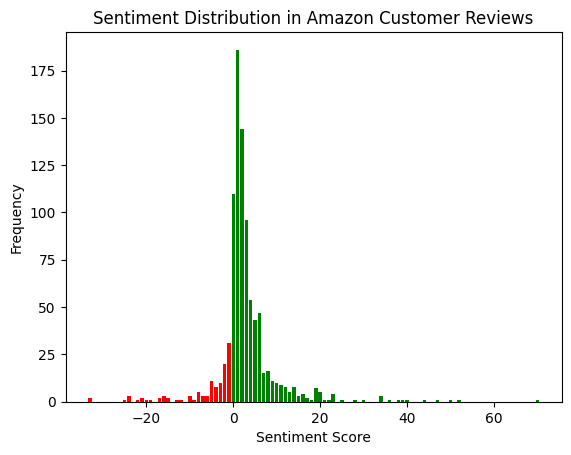

In [18]:
# Visualize the sentiment distribution frequency of positive and negative words from Amazon Customer Reviews
plt.bar(aggregate_sentiment['sentiment_score'], aggregate_sentiment['count'], color=['green' if score >= 0 else 'red' for score in aggregate_sentiment['sentiment_score']])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution in Amazon Customer Reviews')
plt.show()

Based on the sentiment distribution scores, it is evident that there is a higher frequency of positive comments from Amazon Customer Reviews.

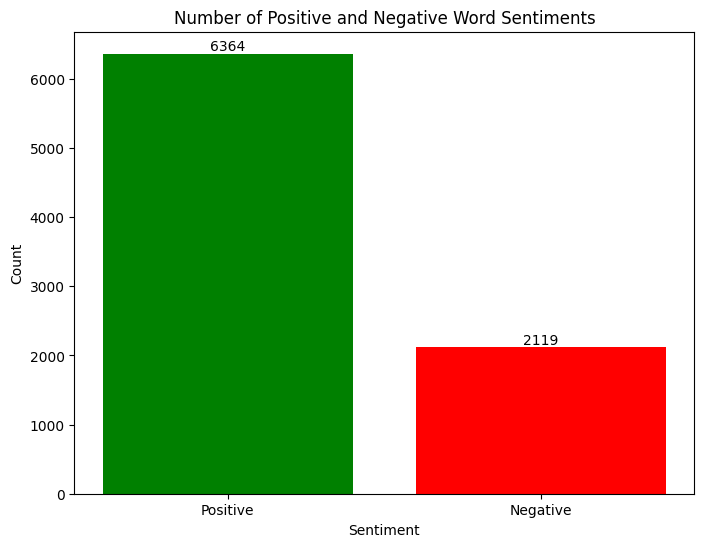

In [19]:
import matplotlib.pyplot as plt

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word.lower() for word in tokens if word.isalnum()]
    return ' '.join(tokens)

# Function to count sentiment words
def count_sentiment_words(text, sentiment):
    words = text.split()
    sentiment_words = [word for word in words if word in sentiment]
    return len(sentiment_words)

# Preprocess positive and negative reviews
positive_reviews = ' '.join(amazon_reviews[amazon_reviews['sentiment_score'] > 0]['review description'].apply(preprocess_text))
negative_reviews = ' '.join(amazon_reviews[amazon_reviews['sentiment_score'] < 0]['review description'].apply(preprocess_text))

# Count positive and negative sentiment words
positive_count = count_sentiment_words(positive_reviews, positive_words)
negative_count = count_sentiment_words(negative_reviews, negative_words)

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Number of Positive and Negative Word Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Add counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()


Based on the Amazon Customer Reviews descriptions, there are a higher number of positive words than negative words.

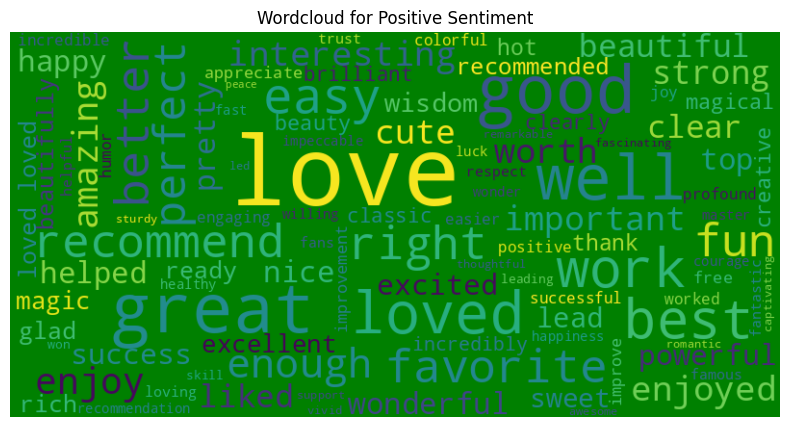

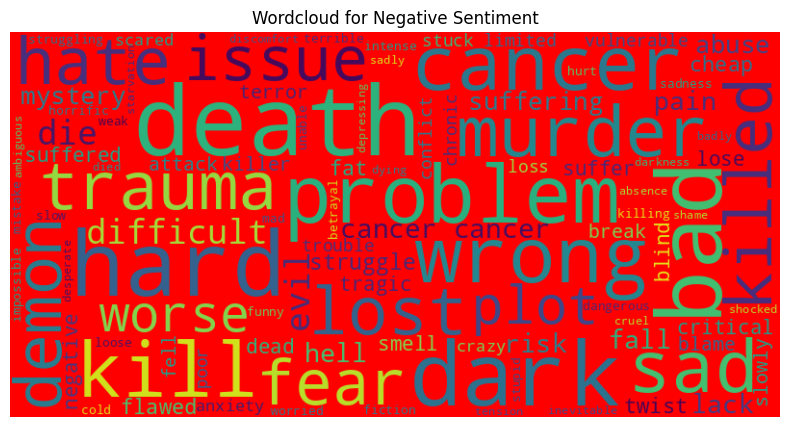

In [20]:
from wordcloud import WordCloud
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

# Load Bing sentiment lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word.lower() for word in tokens if word.isalnum()]
    return ' '.join(tokens)

# Function to filter words based on sentiment
def filter_sentiment_words(text, sentiment):
    words = text.split()
    filtered_words = [word for word in words if word in sentiment]
    return ' '.join(filtered_words)

# Function to generate word cloud
def plot_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color=color, max_words=100, colormap='viridis', max_font_size=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Preprocess positive and negative reviews
positive_reviews = ' '.join(amazon_reviews[amazon_reviews['sentiment_score'] > 0]['review description'].apply(preprocess_text))
negative_reviews = ' '.join(amazon_reviews[amazon_reviews['sentiment_score'] < 0]['review description'].apply(preprocess_text))

# Filter words based on sentiment using Bing lexicon
positive_reviews_filtered = filter_sentiment_words(positive_reviews, positive_words)
negative_reviews_filtered = filter_sentiment_words(negative_reviews, negative_words)

# Generate word clouds
plot_wordcloud(positive_reviews_filtered, 'Wordcloud for Positive Sentiment', 'green')
plot_wordcloud(negative_reviews_filtered, 'Wordcloud for Negative Sentiment', 'red')

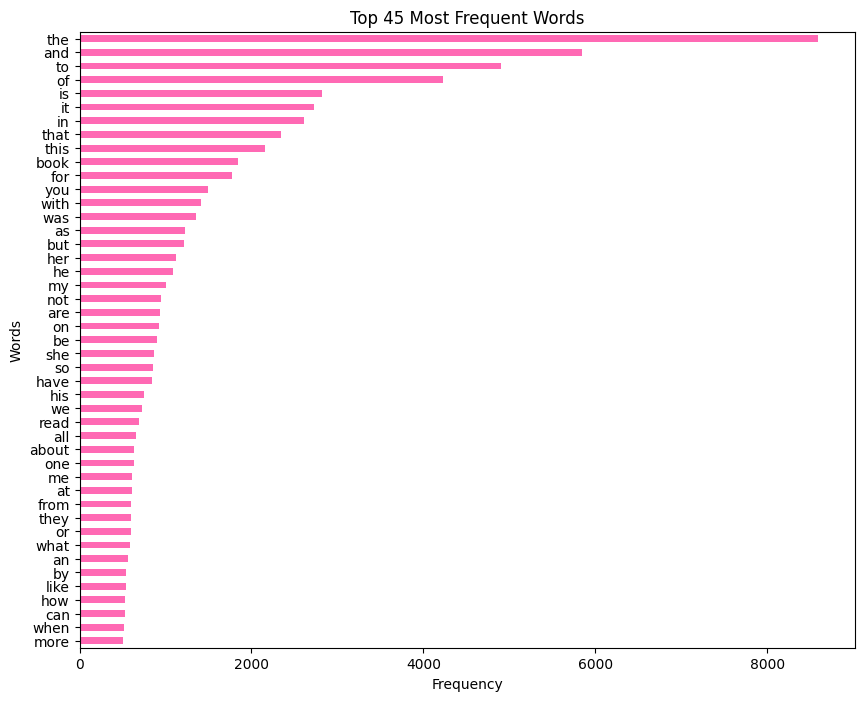

In [21]:
# Visualizing word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(amazon_reviews['review description'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_sum = word_freq.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
word_freq_sum.head(45).plot(kind='barh', color='hotpink')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 45 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

This part visualizes the frequency of positive and negative words separately, displaying the top 45 most frequent positive and negative words.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


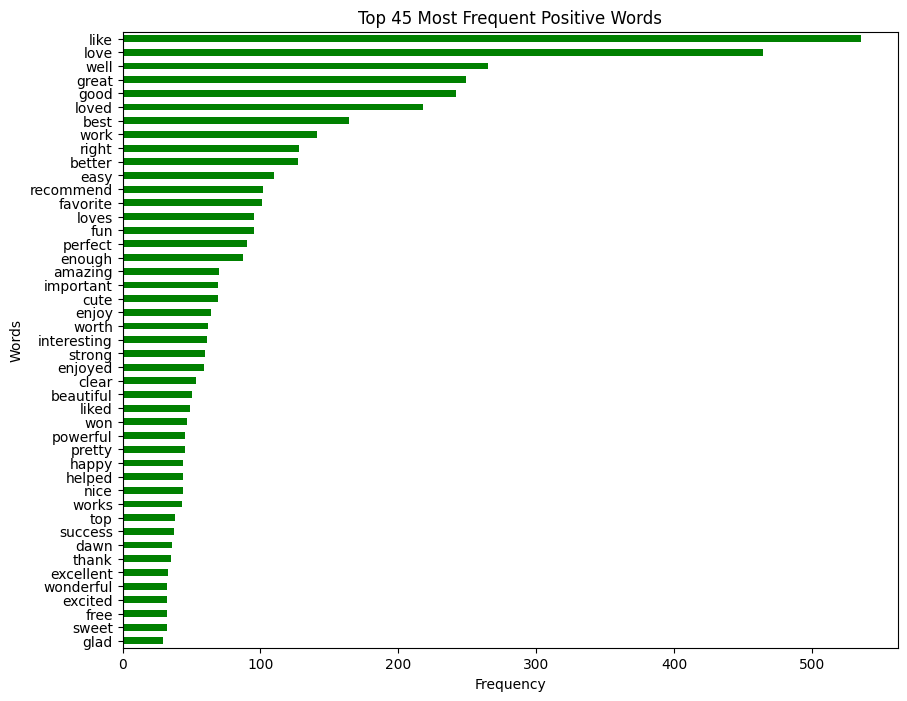

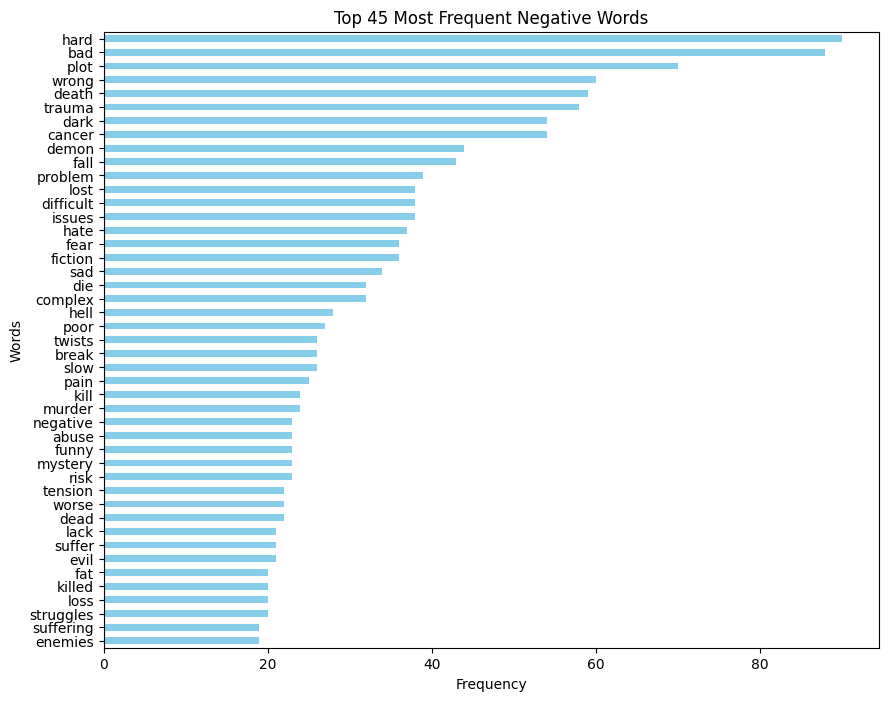

In [22]:
# Visualizing word frequencies for positive and negative words
vectorizer_pos = CountVectorizer(vocabulary=positive_words)
X_pos = vectorizer_pos.fit_transform(amazon_reviews['review description'])
word_freq_positive = pd.DataFrame(X_pos.toarray(), columns=vectorizer_pos.get_feature_names_out())
word_freq_sum_positive = word_freq_positive.sum().sort_values(ascending=False)

vectorizer_neg = CountVectorizer(vocabulary=negative_words)
X_neg = vectorizer_neg.fit_transform(amazon_reviews['review description'])
word_freq_negative = pd.DataFrame(X_neg.toarray(), columns=vectorizer_neg.get_feature_names_out())
word_freq_sum_negative = word_freq_negative.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
word_freq_sum_positive.head(45).plot(kind='barh', color='green')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 45 Most Frequent Positive Words')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 8))
word_freq_sum_negative.head(45).plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 45 Most Frequent Negative Words')
plt.gca().invert_yaxis()
plt.show()

### **Conclusion**

Through conducting sentiment analysis on Amazon’s Top 100 Bestselling Book reviews, I aimed to provide valuable insights into customer opinions and preferences in the realm of popular literature. Based on my analysis, it was evident that Amazon Book Reviewers mostly wrote positive reviews rather than negative ones. This analysis will not only benefit publishers and authors but also assist readers in making informed decisions about their book selections.

